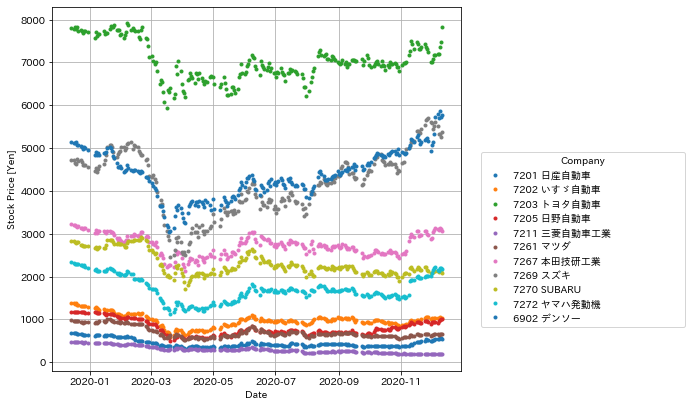

In [5]:
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime

now = datetime.datetime.now()
now = now.strftime("%y%m%d")

def main():
    num = len(data_dict)
    #fig, ax = plt.subplots(num, 1, figsize=(16, 3*num))
    fig, ax = plt.subplots(figsize=(10, 6))
    legend_list = []
    i = 0
    for mykey, company_name in data_dict.items():
        company_code = str(mykey) + '.T'
        my_share = share.Share(company_code)
        
        try:
            # 1日毎の1年分のデータを取得する場合
            symbol_data = my_share.get_historical(share.PERIOD_TYPE_YEAR,
                                                  1,
                                                  share.FREQUENCY_TYPE_DAY,
                                                  1)
            # 5分毎の10日分のデータを取得する場合
            '''
            symbol_data = my_share.get_historical(share.PERIOD_TYPE_DAY,
                                                  10,
                                                  share.FREQUENCY_TYPE_MINUTE,
                                                  5)
            '''
            df = pd.DataFrame(symbol_data.values(), index=symbol_data.keys()).T
            df.timestamp = pd.to_datetime(df.timestamp, unit='ms')
            # 日本標準時間に変換
            df.index = pd.DatetimeIndex(df.timestamp, name='timestamp').tz_localize('UTC').tz_convert('Asia/Tokyo')
            # csvファイルに保存
            #df.to_csv(now + "_" + str(mykey) + "_" + company_name + ".csv", index=False)
            #ax[i].set_title( "{0} ({1})".format(company_name, mykey))
            ax.plot(df.index, df.close, '.')
            ax.grid(True)
            ax.set_ylabel("Stock Price [Yen]")
            #ax[i].label_outer() 一番外側のラベルのみ表示
            legend_list.append(str(mykey) + " " + company_name)
            if i == (num - 1):
                ax.set_xlabel("Date")
        except YahooFinanceError as e:
            print(e.message)
            pass
        i += 1
    ax.legend(labels= legend_list,
              bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
              borderaxespad=0.,
              ncol=1,
              mode="expand",
              title="Company")
    plt.rcParams['font.size'] = 18 # ラベルやタイトルなど全フォントのデフォルトサイズ
    plt.subplots_adjust(right=0.7)
    plt.tight_layout() # ラベルレイアウトを調整する。文字がはみ出ないようにする。
    #plt.show()
    fig_name = now + "_stock_price.png"
    plt.savefig(fig_name)

if __name__ == '__main__':
    data_dict = { 7201:'日産自動車',
                  7202:'いすゞ自動車',
                  7203:'トヨタ自動車',
                  7205:'日野自動車',
                  7211:'三菱自動車工業',
                  7261:'マツダ',
                  7267:'本田技研工業',
                  7269:'スズキ',
                  7270:'SUBARU',
                  7272:'ヤマハ発動機',
                  6902:'デンソー'}
                 
    main()

In [2]:
pip install yahoo_finance_api2

  Created wheel for yahoo-finance-api2: filename=yahoo_finance_api2-0.0.9-cp36-none-any.whl size=3690 sha256=79f3d504f57c345da78d99921ee67a5e30cbe8c739335da561c461e20397e37f
  Stored in directory: /root/.cache/pip/wheels/15/39/5b/85c9dfaaf940699ca6dadd79685eff20828edc4890197f552a
Successfully built yahoo-finance-api2


In [4]:
pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 5.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120275 sha256=5af2d7025aa7a8dfeab5c63b5d91e19218c538c58dab54474b663582814b4b7b
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib
